# **Modelo de predicción de Fuga de Clientes en una compañía de telecomunicaciones**

## **Evaluación y selección del modelo definitivo**

Una vez finalizado el proceso de preparación de datos y creación de los modelos óptimos para cada algoritmo, procedemos a la evaluación de los modelos con los datos de prueba separados del conjunto de datos inicial.

**Importación librerías**

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib
import os


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================
from sklearn.neighbors import LocalOutlierFactor

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from funciones import multiple_plot, plot_roc_curve

In [3]:
ruta_objetos = 'objetos_guardados/'
dp = pd.read_csv(ruta_objetos + 'datos_prueba/data_prueba.csv')

In [6]:
dp.drop('Unnamed: 0', axis = 'columns', inplace = True)

In [12]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 669 non-null    float64
 1   MonthlyCharges                         669 non-null    float64
 2   TotalCharges                           669 non-null    float64
 3   gender_Male                            669 non-null    int64  
 4   SeniorCitizen_Yes                      669 non-null    int64  
 5   Partner_Yes                            669 non-null    int64  
 6   Dependents_Yes                         669 non-null    int64  
 7   PhoneService_Yes                       669 non-null    int64  
 8   MultipleLines_No phone service         669 non-null    int64  
 9   MultipleLines_Yes                      669 non-null    int64  
 10  InternetService_Fiber optic            669 non-null    int64  
 11  Intern

**Creación de vectores con variables predictoras y variable a predecir**

In [8]:
xp = dp.iloc[:, :-1]
yp = dp.iloc[:, -1]

**Creación de los modelos**

In [14]:
ruta_modelos = 'objetos_guardados/modelos/'

# Lista para almacenar los modelos cargados
modelos_cargados = []
dr = pd.DataFrame()

# Itera sobre los archivos en la ruta
for archivo_modelo in os.listdir(ruta_modelos):
    # Comprueba si el archivo es un modelo (puedes ajustar esta comprobación según tu estructura de nombres)
    
    if archivo_modelo.endswith('.pkl'):
        ruta_completa = os.path.join(ruta_modelos, archivo_modelo)
    
        # Carga el modelo
        modelo_cargado = joblib.load(ruta_completa)

        # Agrega el modelo a la lista
        modelos_cargados.append(archivo_modelo)

        # Realizar predicciones (opcional)
        y_pred = modelo_cargado.predict(xp)


        # Adicionar una nueva fila 
        nuevoModelo = {'model': archivo_modelo
                      , 'Descripcion': modelo_cargado
                      , 'accuracy': metrics.accuracy_score(yp, y_pred)
                      , 'recall': metrics.recall_score(yp, y_pred)
                      , 'f1_score': metrics.f1_score(yp, y_pred)
                      , 'AUC': metrics.roc_auc_score(yp, y_pred)
                      , 'support': round(dp.shape[0],0)
                     }
        dr = dr.append(nuevoModelo, ignore_index=True)

# Imprimir el DataFrame actualizado
dr

,model,Descripcion,accuracy,recall,f1_score,AUC,support
0,DTree_churn.pkl,"DecisionTreeClassifier(ccp_alpha=1e-06, random...",0.723468,0.488235,0.472934,0.645921,669
1,RForest_churn.pkl,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.744395,0.805882,0.615730,0.764665,669
2,RL_Lineal.pkl,"LogisticRegression(class_weight='balanced', mu...",0.763827,0.811765,0.635945,0.779630,669
3,smvRadial_churn.pkl,"SVC(C=1, probability=True, random_state=0)",0.762332,0.770588,0.622328,0.765054,669


In [15]:
# Top 3 de los mejores modelos
dr.sort_values(by='f1_score', ascending=False)

,model,Descripcion,accuracy,recall,f1_score,AUC,support
2,RL_Lineal.pkl,"LogisticRegression(class_weight='balanced', mu...",0.763827,0.811765,0.635945,0.779630,669
3,smvRadial_churn.pkl,"SVC(C=1, probability=True, random_state=0)",0.762332,0.770588,0.622328,0.765054,669
1,RForest_churn.pkl,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.744395,0.805882,0.615730,0.764665,669
0,DTree_churn.pkl,"DecisionTreeClassifier(ccp_alpha=1e-06, random...",0.723468,0.488235,0.472934,0.645921,669


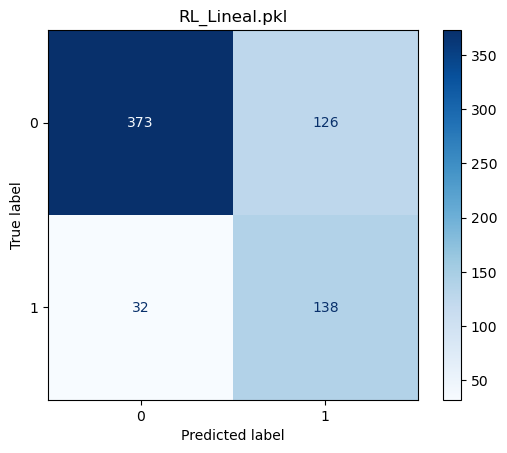

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       499
           1       0.52      0.81      0.64       170

    accuracy                           0.76       669
   macro avg       0.72      0.78      0.73       669
weighted avg       0.82      0.76      0.78       669



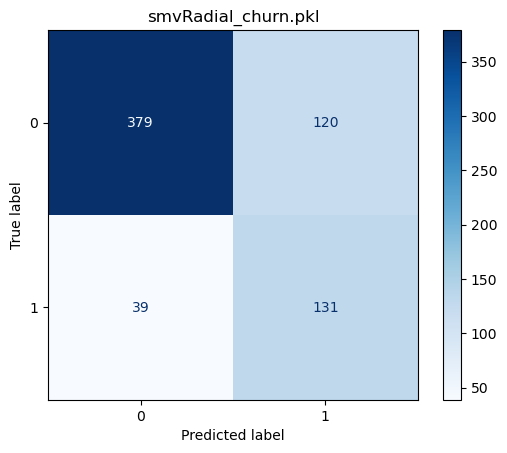

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       499
           1       0.52      0.77      0.62       170

    accuracy                           0.76       669
   macro avg       0.71      0.77      0.72       669
weighted avg       0.81      0.76      0.77       669



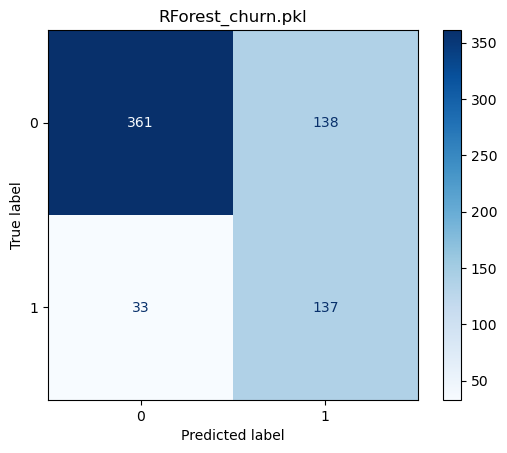

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       499
           1       0.50      0.81      0.62       170

    accuracy                           0.74       669
   macro avg       0.71      0.76      0.71       669
weighted avg       0.81      0.74      0.76       669



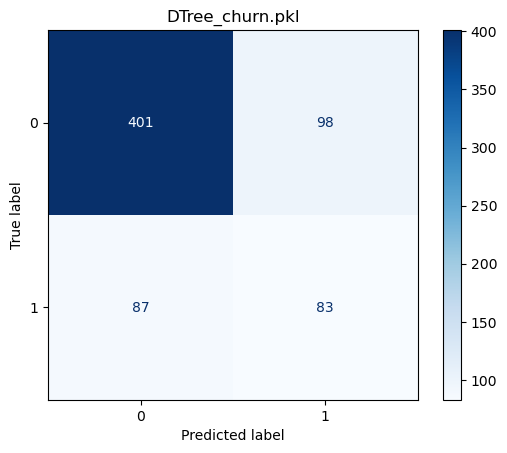

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       499
           1       0.46      0.49      0.47       170

    accuracy                           0.72       669
   macro avg       0.64      0.65      0.64       669
weighted avg       0.73      0.72      0.73       669



In [17]:
for i, row in dr.sort_values(by='f1_score', ascending=False).iterrows():
    model_name = row['model']
    
    if archivo_modelo.endswith('.pkl'):
        ruta_completa = os.path.join(ruta_modelos, model_name)
    
        # Carga el modelo
        modelo_cargado = joblib.load(ruta_completa)

        # Realizar predicciones (opcional)
        y_pred = modelo_cargado.predict(xp)

        # Calcular la matriz de confusión
        cm = confusion_matrix(yp, y_pred)
        
        # Crear la visualización de la matriz de confusión
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(yp))
        
        # Mostrar la visualización
        disp.plot(cmap='Blues')
        
        # Configurar el título
        plt.title(model_name)
        
        # Mostrar la figura
        plt.show()

        # Mostrar el informe de clasificación
        print(classification_report(yp, y_pred))

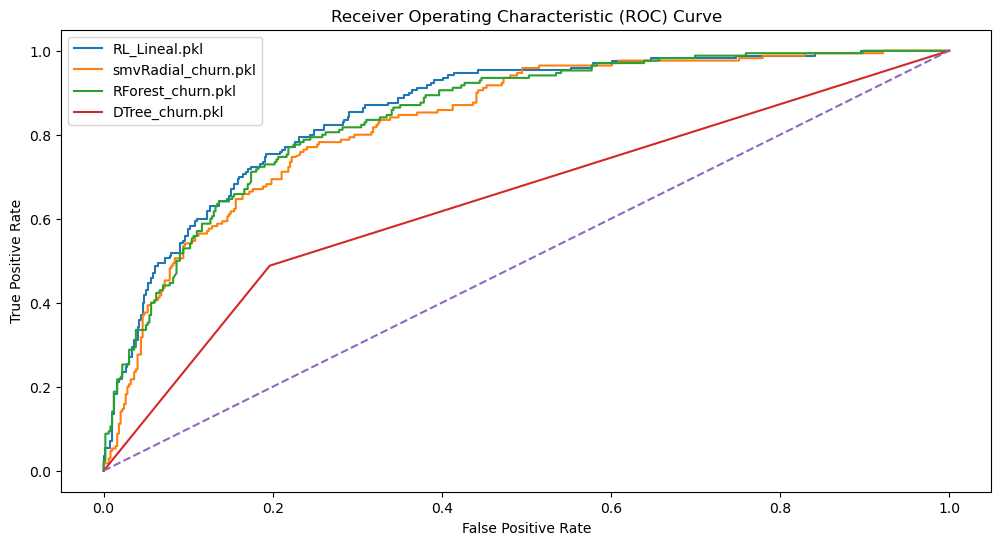

In [18]:
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))  


for i, row in dr.sort_values(by='f1_score', ascending=False).iterrows():
    model_name = row['model']
    
    if archivo_modelo.endswith('.pkl'):
        ruta_completa = os.path.join(ruta_modelos, model_name)
    
        # Carga el modelo
        modelo_cargado = joblib.load(ruta_completa)
        
        # Obtener probabilidades de predicción del modelo
        probs = modelo_cargado.predict_proba(xp)  

        # Seleccionar la columna correspondiente a la probabilidad de clase positiva
        probs = probs[:, 1]  

        # Calcular el AUC-ROC
        auc = roc_auc_score(yp, probs*(1))  

        # Calcular las tasas de FPR y TPR
        fpr, tpr, _ = roc_curve(yp, probs*(1))  

        # Graficar la curva ROC del modelo actual
        plt.plot(fpr, tpr, label=model_name)  

        # Mostrar el AUC-ROC y el nombre del modelo
        #print("{:.2f}: {}".format(auc, model_name))  


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')  
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show() 

Se toma el modelo creado a partir de datos balanceados con la metodología del **Submuestreo** para evaluar si mejoran las métricas del mejor modelo.

**Modelo RL con UnderSampling**

In [19]:
modeloRL_Undersampling = joblib.load('objetos_guardados/modelos/UnderSampling/RL_Mullbfgs_US.pkl')

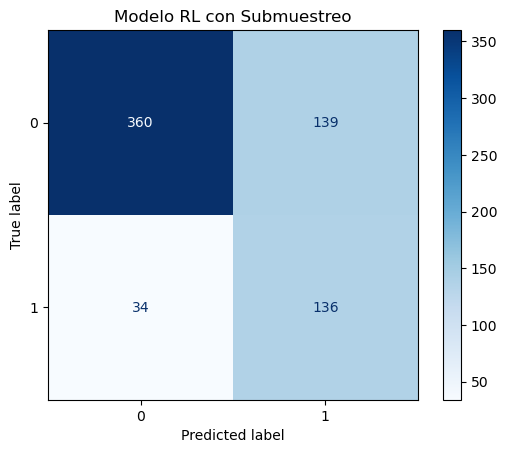

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       499
           1       0.49      0.80      0.61       170

    accuracy                           0.74       669
   macro avg       0.70      0.76      0.71       669
weighted avg       0.81      0.74      0.76       669



In [21]:
y_pred = modeloRL_Undersampling.predict(xp)

# Calcular la matriz de confusión
cm = confusion_matrix(yp, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(yp))

# Mostrar la visualización
disp.plot(cmap='Blues')

# Configurar el título
plt.title('Modelo RL con Submuestreo')

# Mostrar la figura
plt.show()

print(classification_report(yp, y_pred))

### **Conclusiones**

- El mejor modelo posible para acercarnos a la solución del problema es el de **Regresión Lóstica con solver Lineal**, el cual tiene una precisión de 0.7638 y un F-1 Score de 0.6359

- Si bien este modelo cuenta con un nivel de precisión bastante positivo con los clientes que **No** cancelan los productos de la compañía, no es tan preciso con los que sí lo harán. Esto se puede deber principalmente a la poca cantidad de datos que se tiene de la variable objetivo. No obstante, al dirigir las estrategias de retención a los clientes con probabilidad alta de Churn se pueden obtener resultados positivos

### **Recomendaciones para el negocio**

- Clasificar el nivel de importancia de los clientes con riesgo de cancelación de servicio de acuerdo a la rentabilidad que estos aportan para la compañía y la probabilidad estimada por el modelo. Posteriormente, con base en esta clasificación, aplicar estrategias diferenciadas de retención: Descuentos, productos adicionales, etc.

- Buscar estrategias para aumentar la recolección de datos y la curaduría de estos.